In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import iqr

In [55]:
df = pd.read_csv('sha256_benchmarks.csv')

In [56]:
df = df[df['Iteração'] > 10]

In [57]:
print(df.columns)

Index(['Tipo de Encriptação', 'Tamanho do Arquivo (bytes)', 'Iteração',
       'Tempo de Encriptação (μs)'],
      dtype='object')


In [58]:
# Remove linhas com valores nulos nas colunas necessárias
df = df.dropna(subset=['Tamanho do Arquivo (bytes)', 'Tempo de Encriptação (μs)'])



In [59]:

# Função para remover outliers usando o método IQR
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr_value = q3 - q1
    lower = q1 - 1.5 * iqr_value
    upper = q3 + 1.5 * iqr_value
    return data[(data >= lower) & (data <= upper)]

In [60]:
sns.set(style='whitegrid')

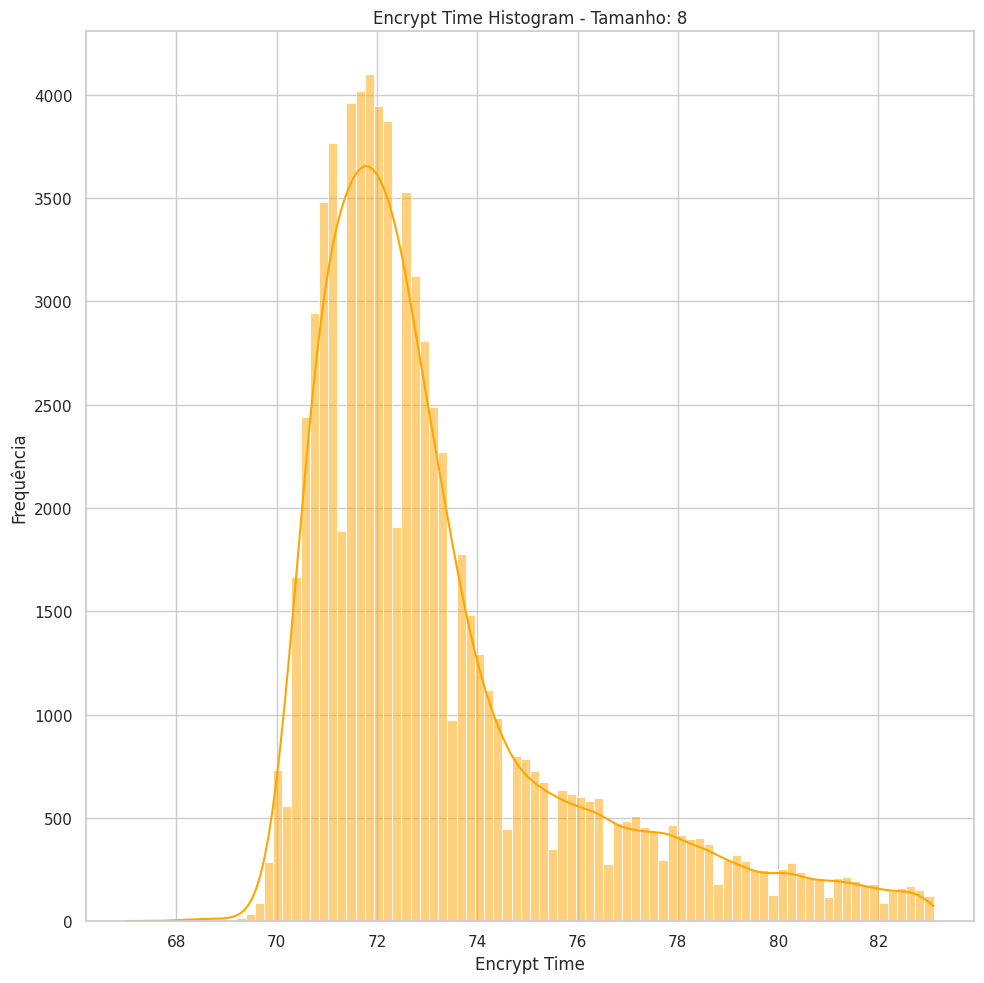

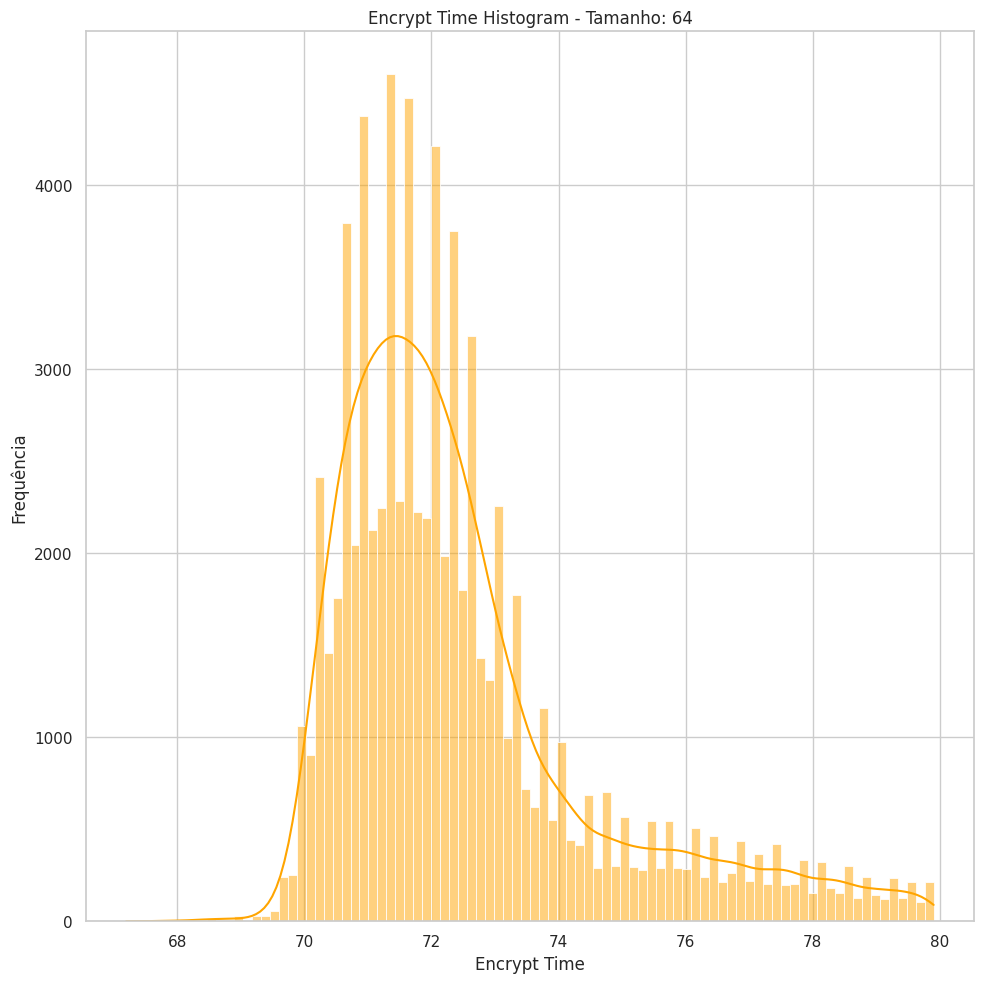

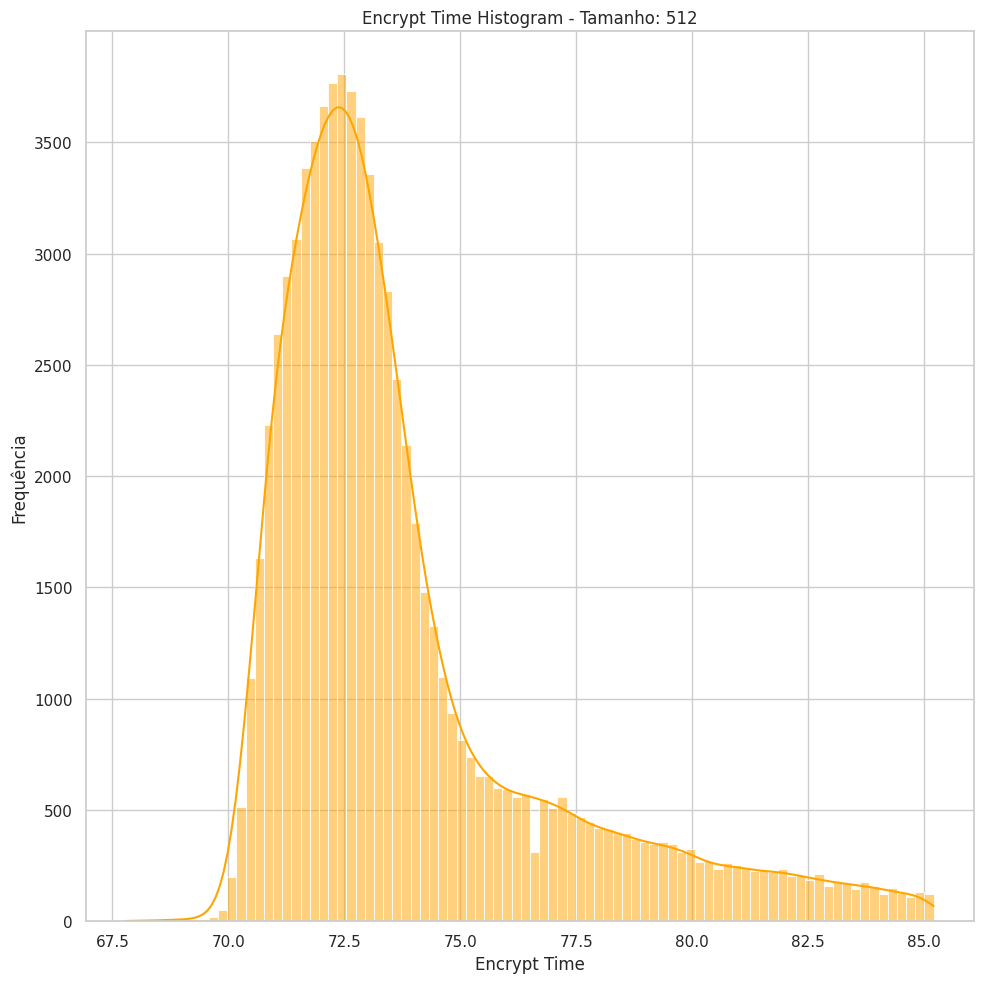

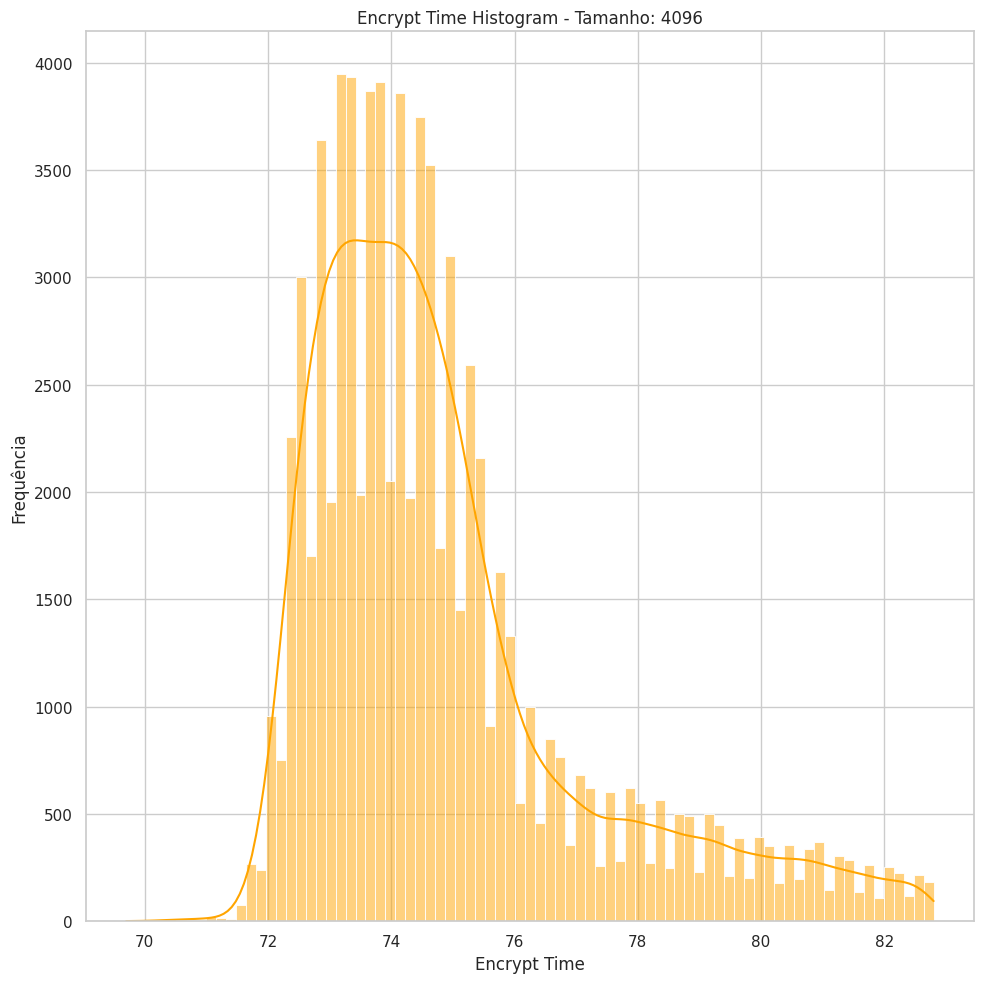

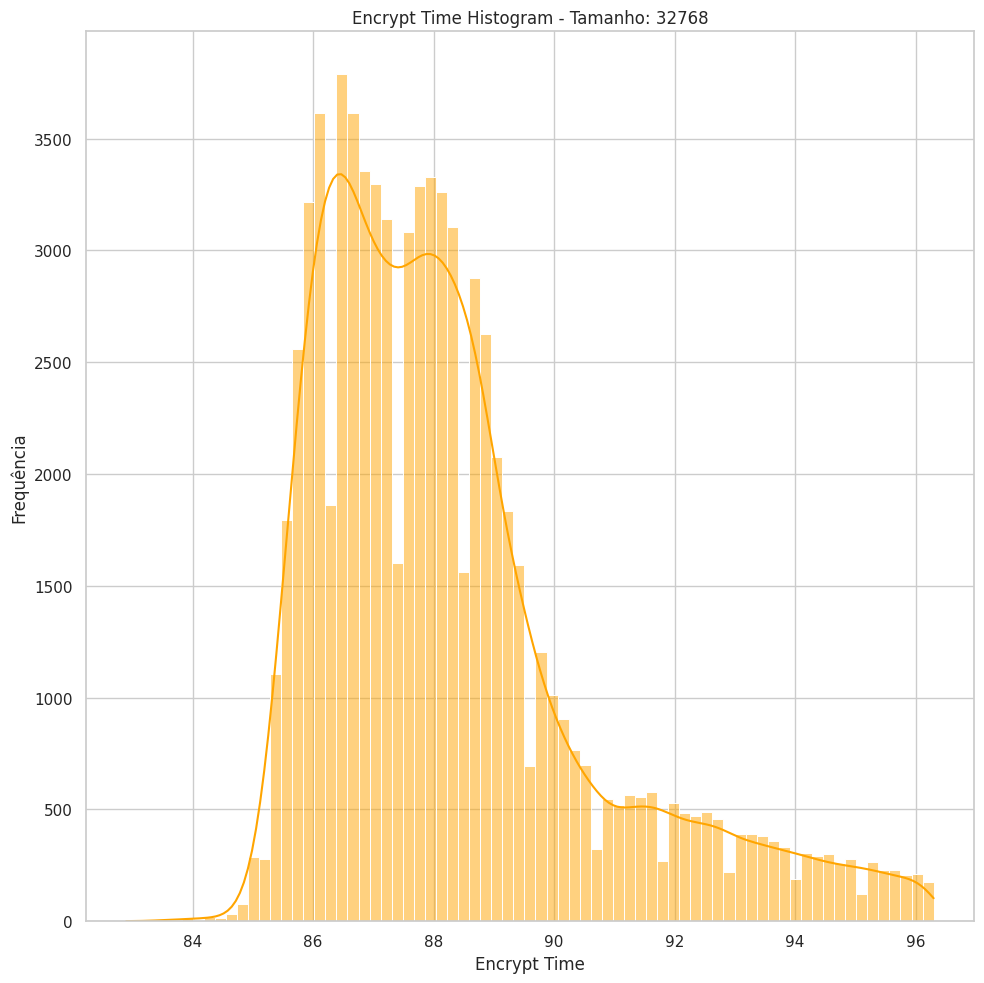

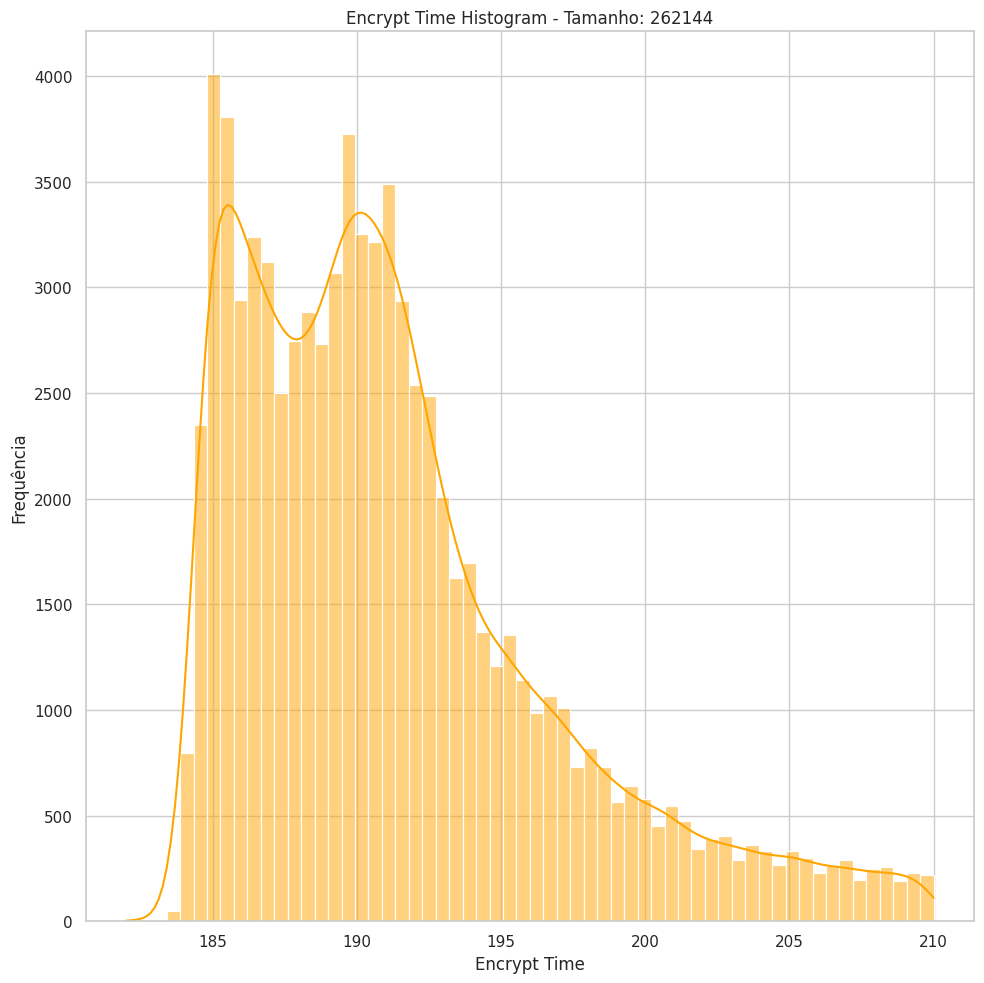

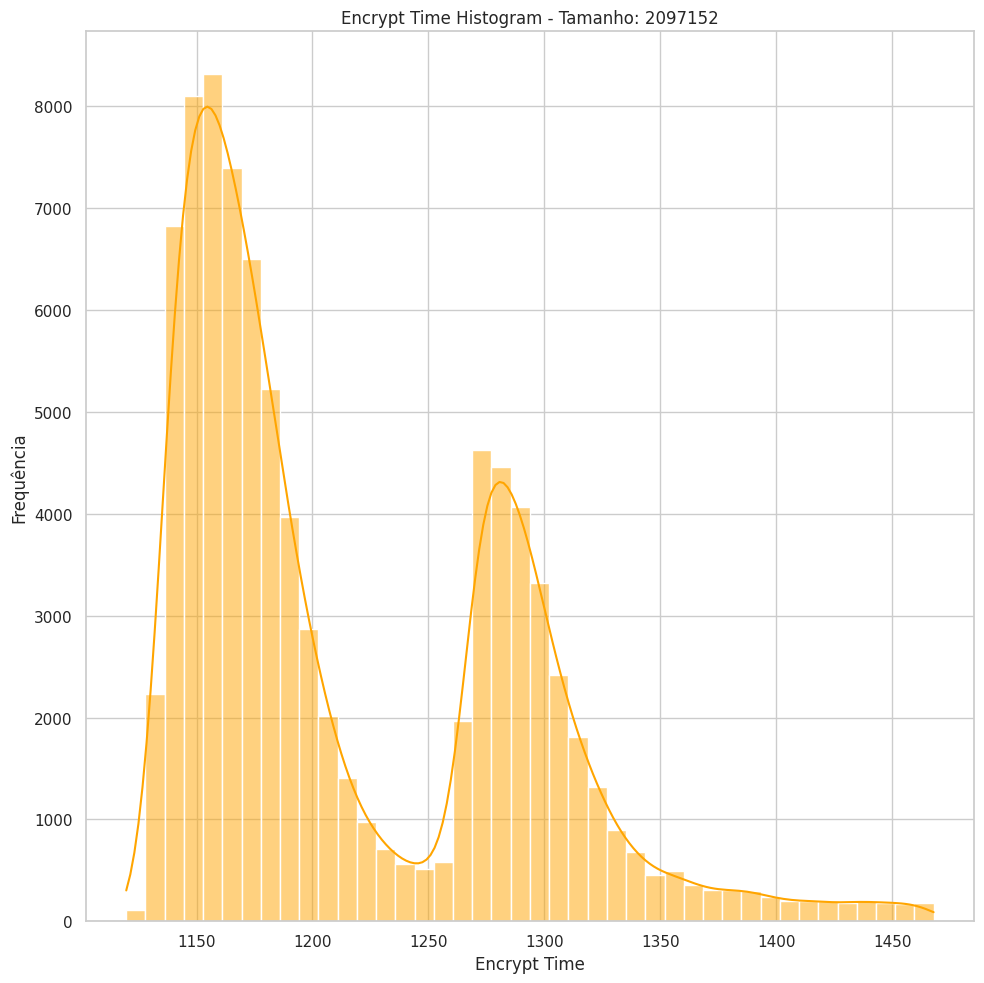

In [61]:
# Por tamanho do ficheiro faz um histograma do tempo de encriptação
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)


    # Escolher o número ideal de bins com base na regra de Freedman-Diaconis
    bin_width = 2 * iqr(subset_clean) / (len(subset_clean) ** (1/3))
    bin_width *= 1.5  # Aumenta a largura dos bins em 50%
    if bin_width == 0:
        continue  # Evita erro se IQR for 0
    bins = int((subset_clean.max() - subset_clean.min()) / bin_width)

    # Plot do histograma
    plt.figure(figsize=(10,10))
    sns.histplot(subset_clean, bins=bins, kde=True, color='orange')
    plt.title(f'Encrypt Time Histogram - Tamanho: {tamanho_valor}')
    plt.xlabel('Encrypt Time')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

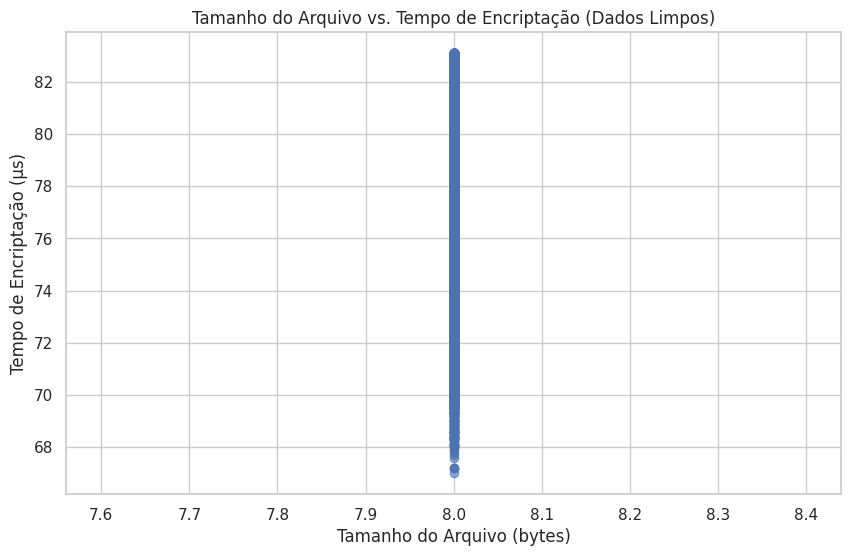

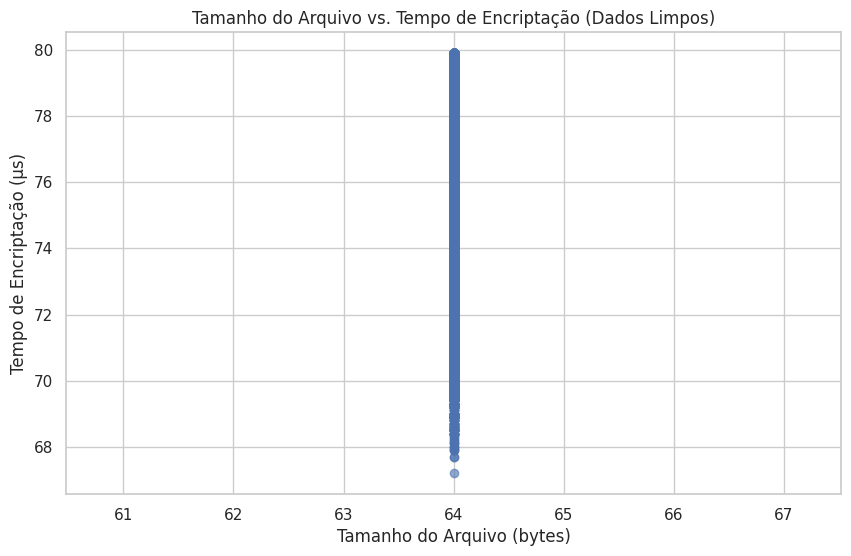

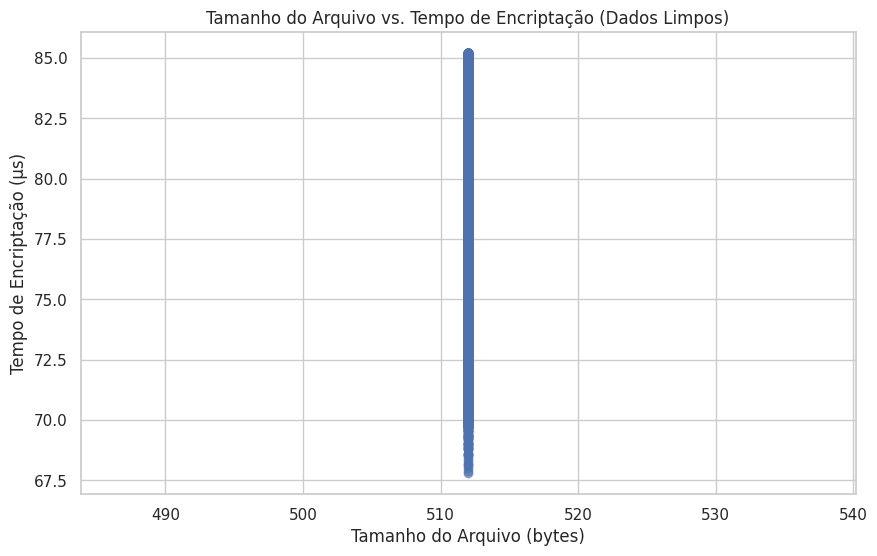

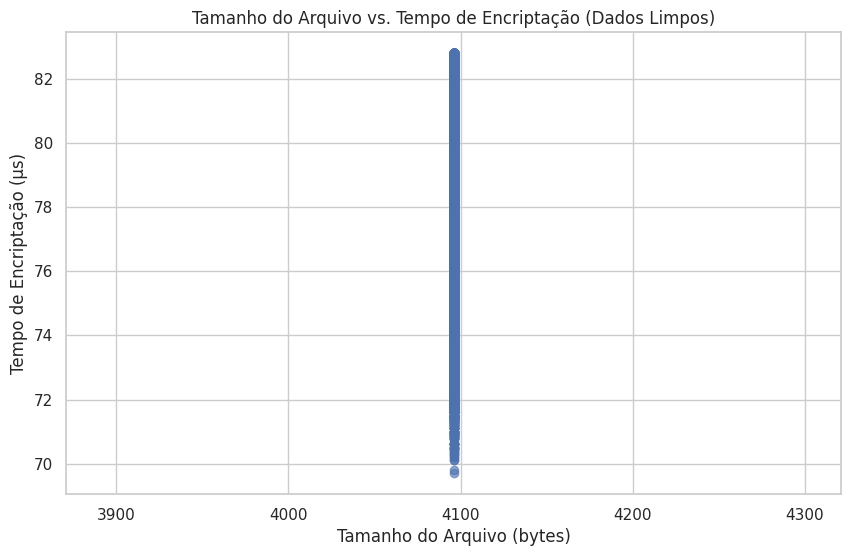

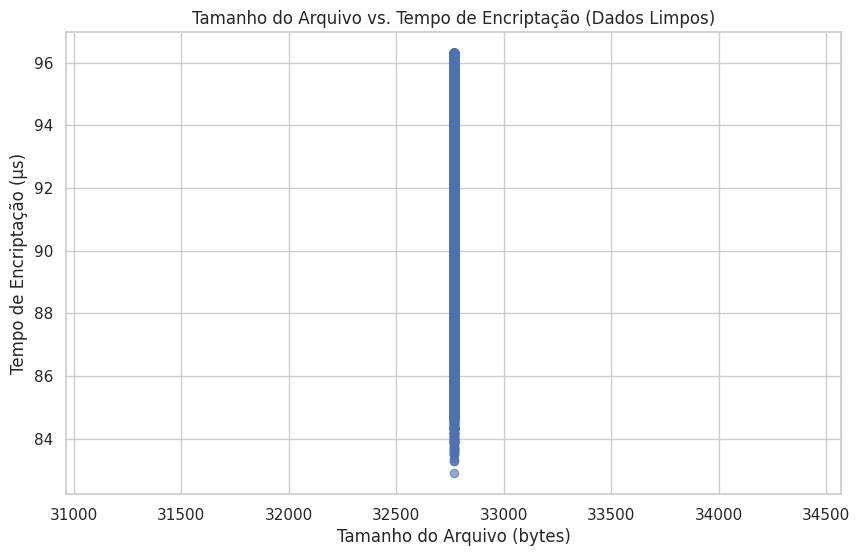

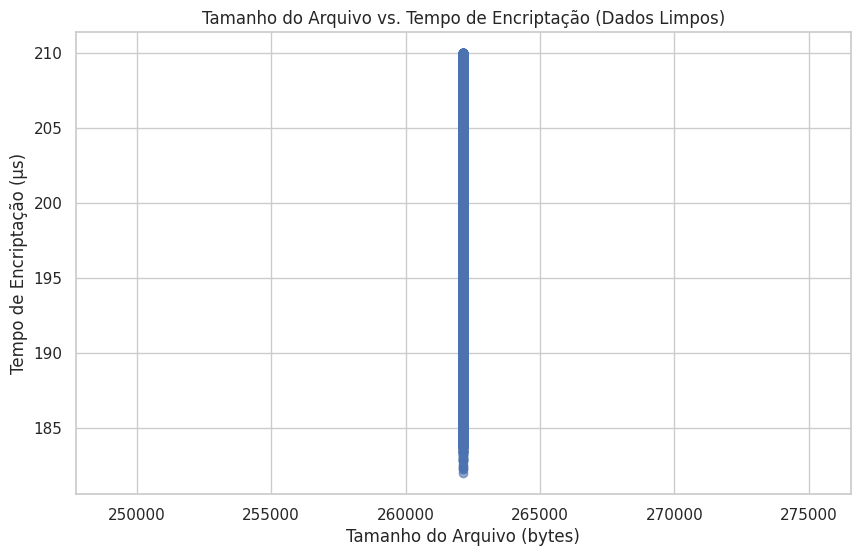

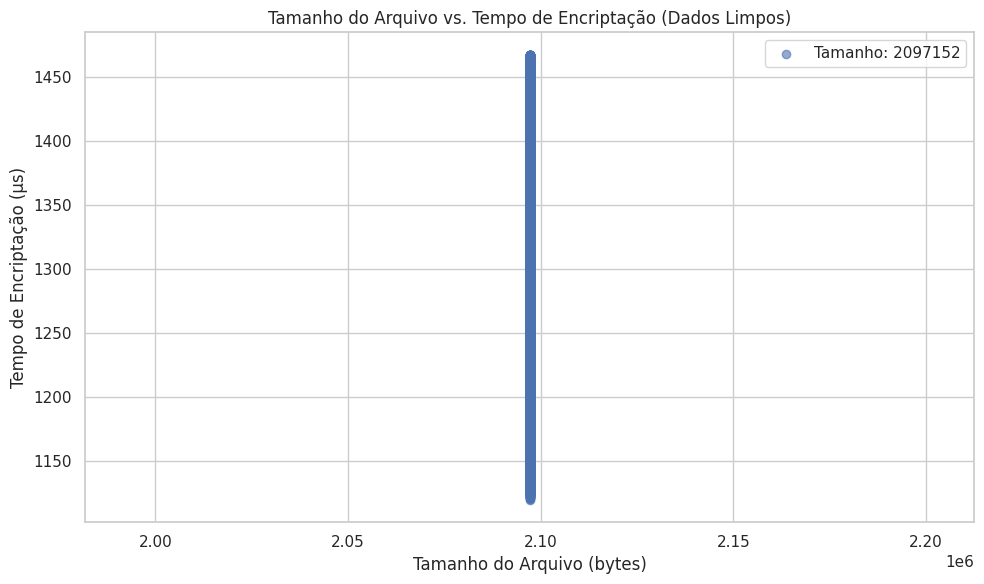

In [62]:
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)

    plt.figure(figsize=(10, 6))
    plt.scatter([tamanho_valor] * len(subset_clean), subset_clean, alpha=0.6, label=f'Tamanho: {tamanho_valor}')
    plt.title('Tamanho do Arquivo vs. Tempo de Encriptação (Dados Limpos)')
    plt.xlabel('Tamanho do Arquivo (bytes)')
    plt.ylabel('Tempo de Encriptação (μs)')
    plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

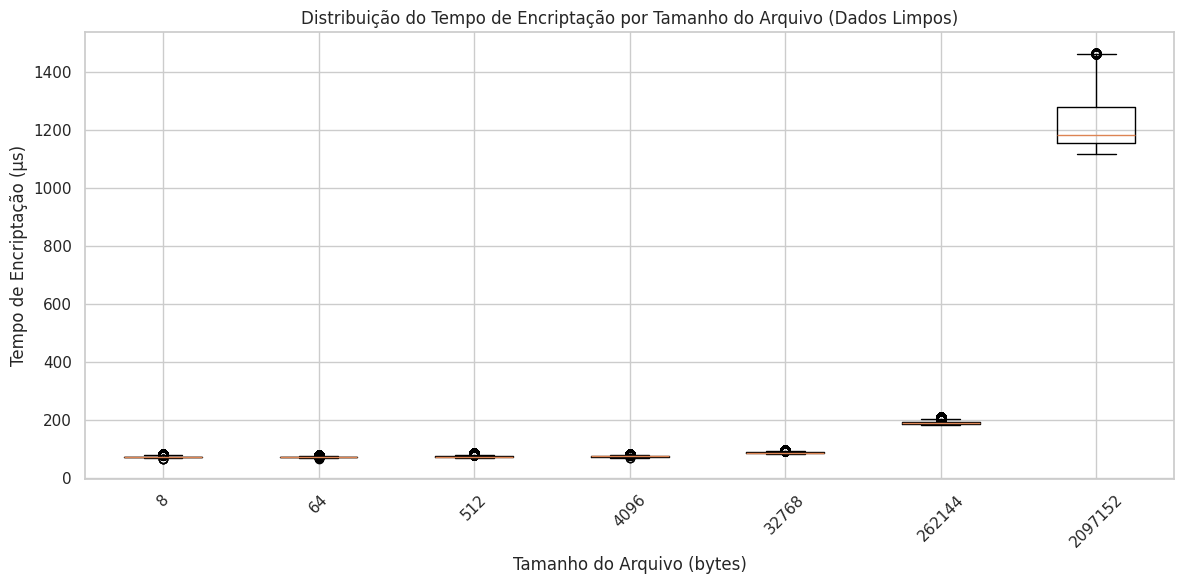

In [63]:
cleaned_data = []

for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)
    cleaned_data.append((tamanho_valor, subset_clean))

plt.figure(figsize=(12, 6))
plt.boxplot([data[1] for data in cleaned_data], labels=[data[0] for data in cleaned_data])
plt.title('Distribuição do Tempo de Encriptação por Tamanho do Arquivo (Dados Limpos)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

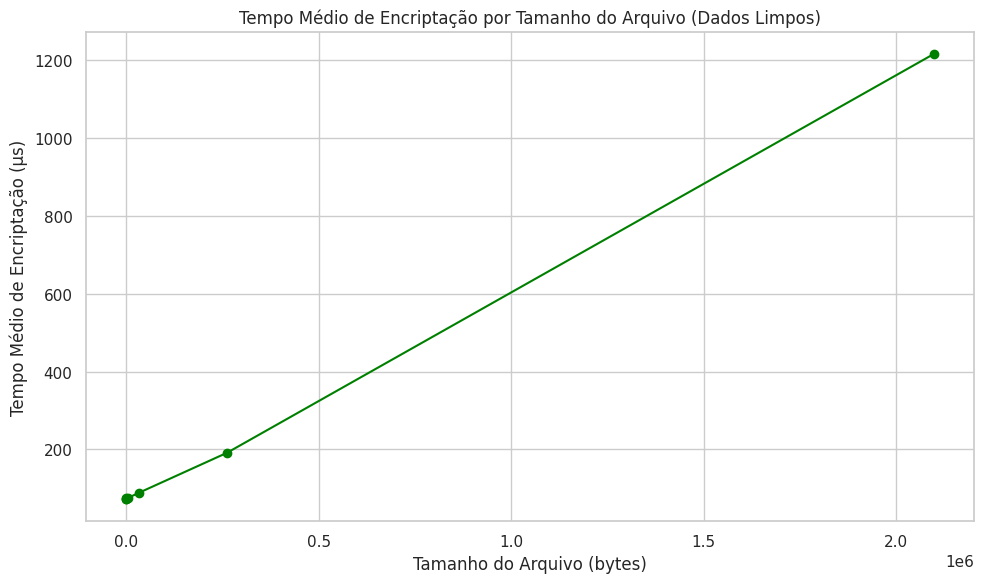

In [64]:
mean_times_clean = []

for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)
    mean_times_clean.append((tamanho_valor, subset_clean.mean()))

mean_times_clean = sorted(mean_times_clean, key=lambda x: x[0])  # Ordenar por tamanho do arquivo

plt.figure(figsize=(10, 6))
plt.plot(
    [data[0] for data in mean_times_clean],
    [data[1] for data in mean_times_clean],
    marker='o', color='green'
)
plt.title('Tempo Médio de Encriptação por Tamanho do Arquivo (Dados Limpos)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo Médio de Encriptação (μs)')
plt.grid(True)
plt.tight_layout()
plt.show()

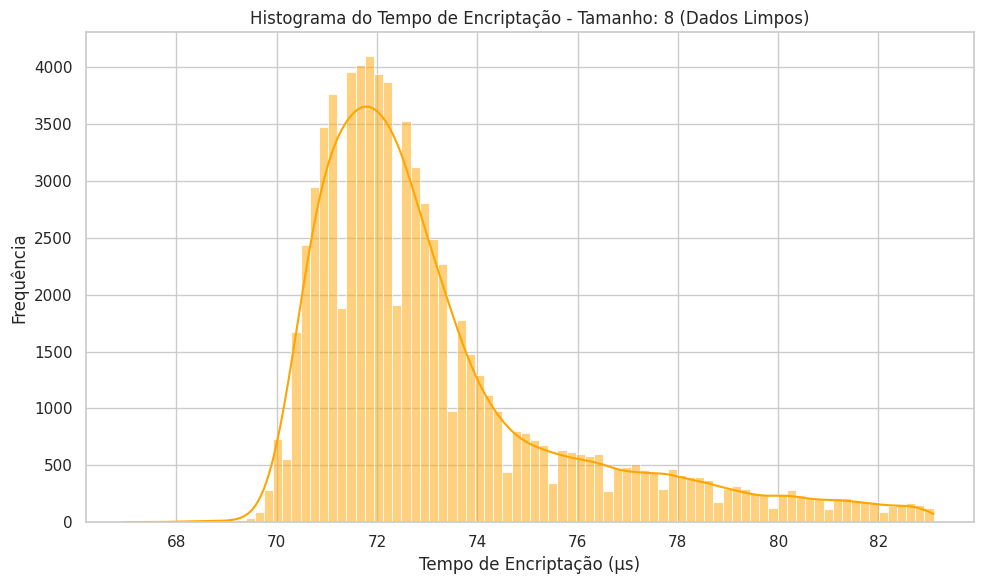

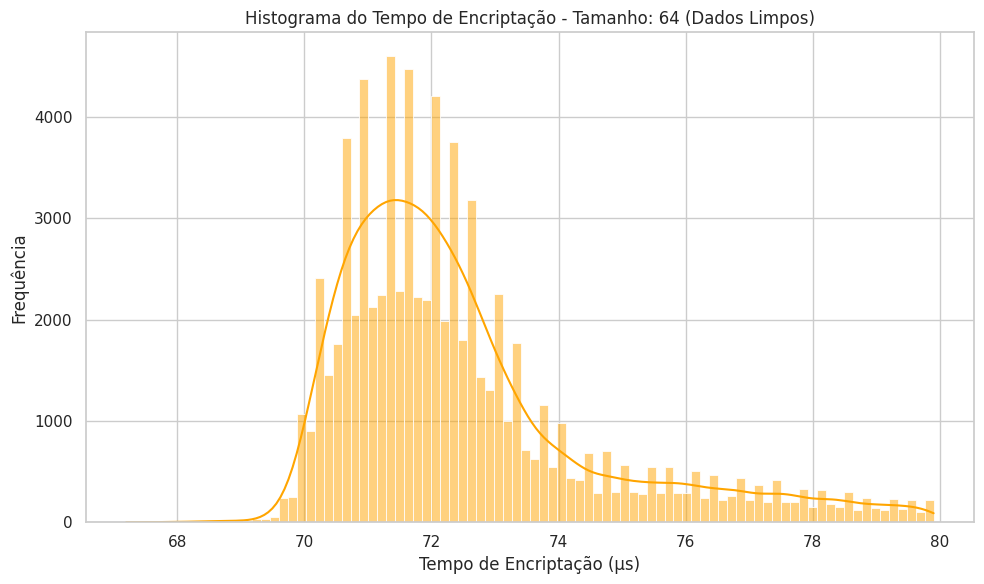

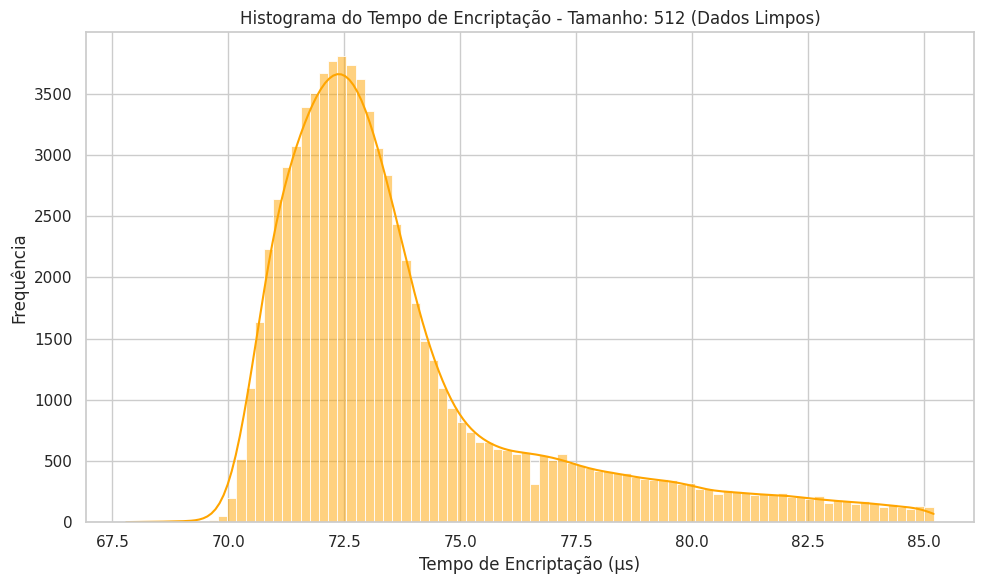

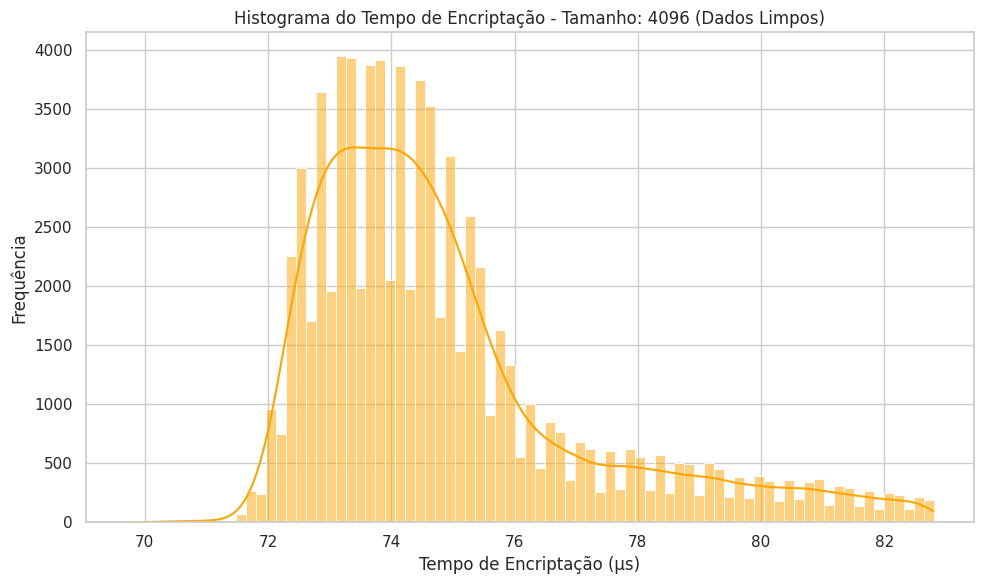

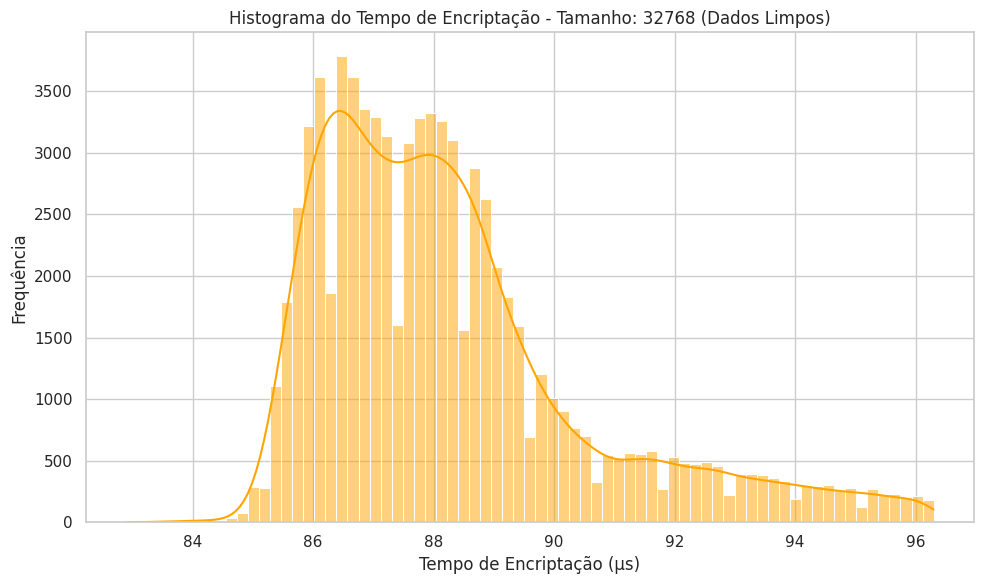

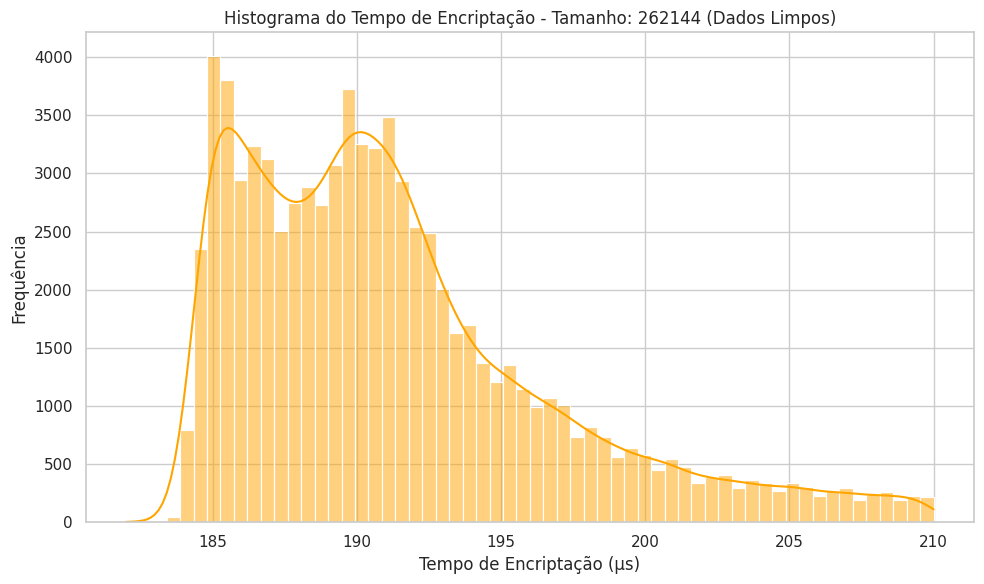

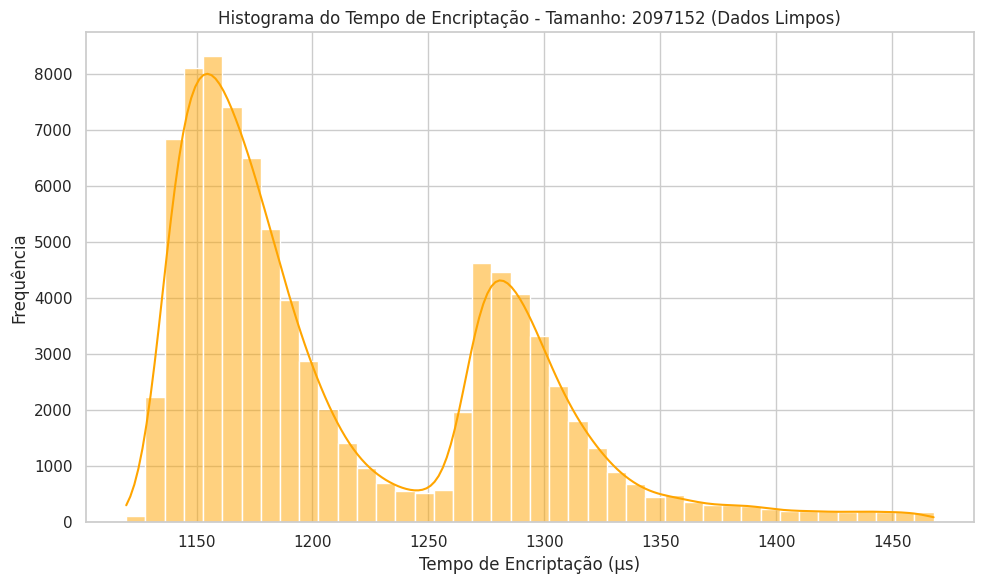

In [65]:
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)

    # Escolher o número ideal de bins com base na regra de Freedman-Diaconis
    bin_width = 2 * iqr(subset_clean) / (len(subset_clean) ** (1/3))
    bin_width *= 1.5  # Aumenta a largura dos bins em 50%
    if bin_width == 0:
        continue  # Evita erro se IQR for 0
    bins = int((subset_clean.max() - subset_clean.min()) / bin_width)

    # Plot do histograma
    plt.figure(figsize=(10, 6))
    sns.histplot(subset_clean, bins=bins, kde=True, color='orange')
    plt.title(f'Histograma do Tempo de Encriptação - Tamanho: {tamanho_valor} (Dados Limpos)')
    plt.xlabel('Tempo de Encriptação (μs)')
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_11827/431177028.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleaned_df, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', palette='muted')


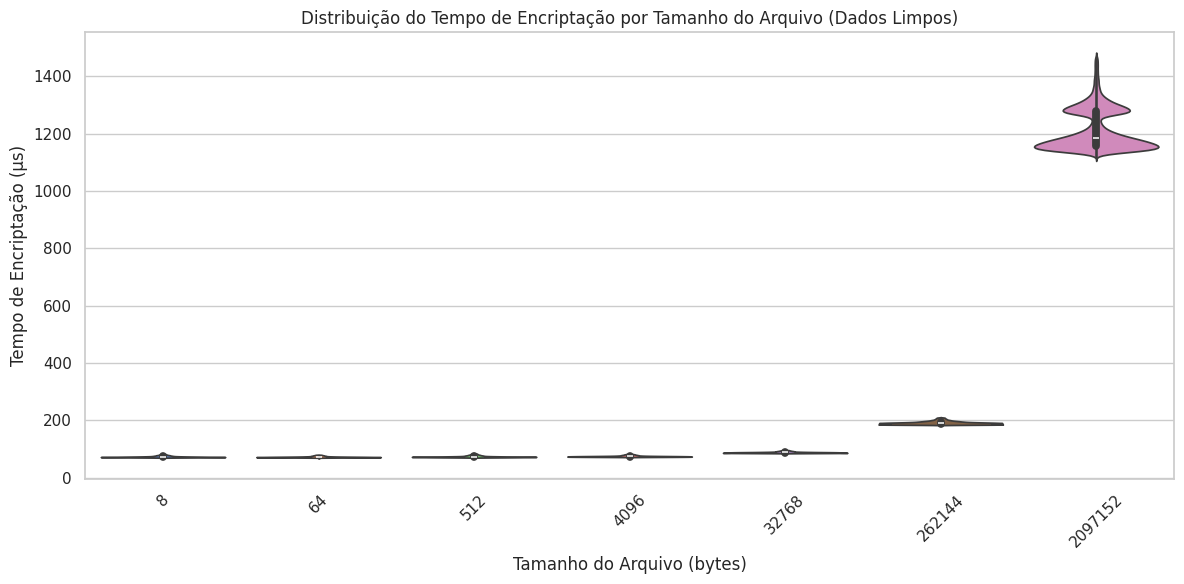

In [66]:
# Criar uma lista para armazenar os dados limpos e os tamanhos correspondentes
cleaned_data = []

for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]['Tempo de Encriptação (μs)']
    subset_clean = remove_outliers(subset)
    cleaned_data.extend([(tamanho_valor, tempo) for tempo in subset_clean])

# Criar um novo DataFrame com os dados limpos
cleaned_df = pd.DataFrame(cleaned_data, columns=['Tamanho do Arquivo (bytes)', 'Tempo de Encriptação (μs)'])

# Criar o violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=cleaned_df, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', palette='muted')
plt.title('Distribuição do Tempo de Encriptação por Tamanho do Arquivo (Dados Limpos)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_11827/3035721105.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_times, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', palette='Blues_d')


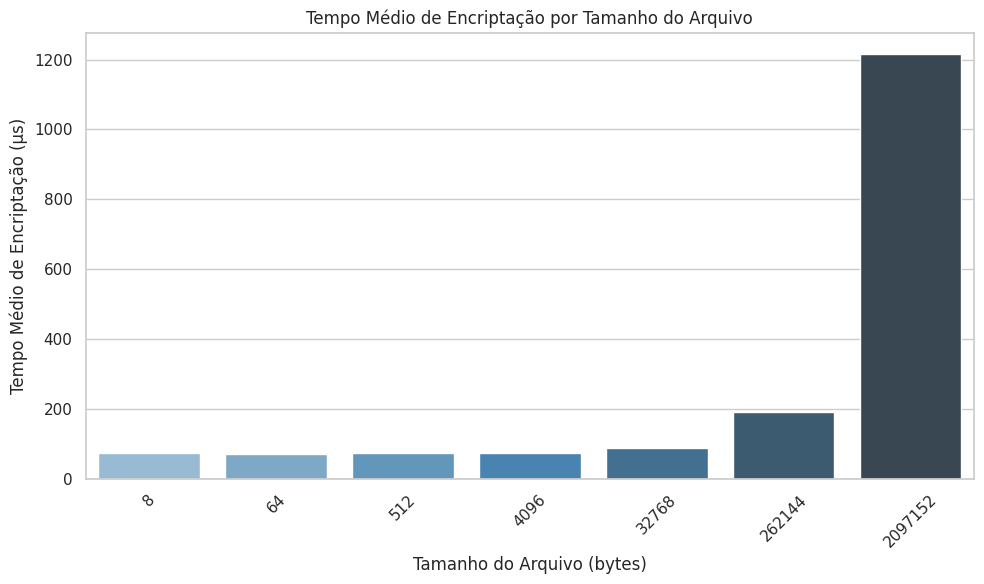

In [67]:
mean_times = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['Tempo de Encriptação (μs)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_times, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', palette='Blues_d')
plt.title('Tempo Médio de Encriptação por Tamanho do Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo Médio de Encriptação (μs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

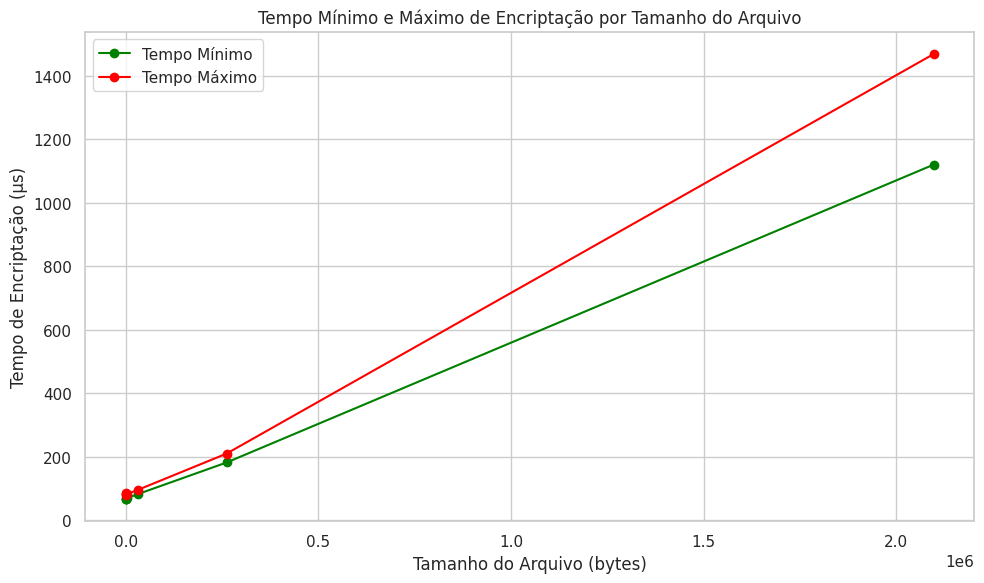

In [68]:
stats = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['Tempo de Encriptação (μs)'].agg(['min', 'max']).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(stats['Tamanho do Arquivo (bytes)'], stats['min'], marker='o', label='Tempo Mínimo', color='green')
plt.plot(stats['Tamanho do Arquivo (bytes)'], stats['max'], marker='o', label='Tempo Máximo', color='red')
plt.title('Tempo Mínimo e Máximo de Encriptação por Tamanho do Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

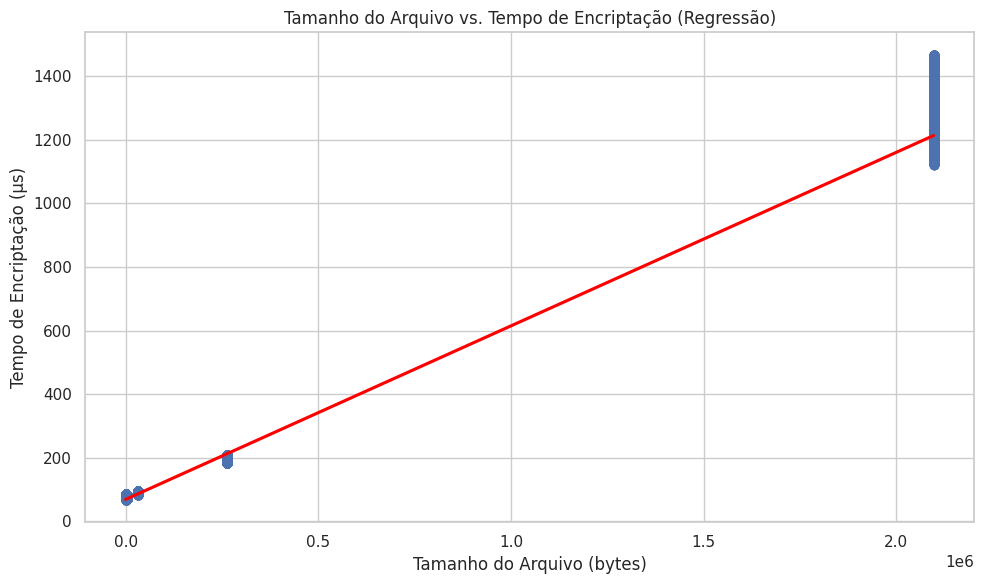

In [69]:
plt.figure(figsize=(10, 6))
sns.regplot(data=cleaned_df, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Tamanho do Arquivo vs. Tempo de Encriptação (Regressão)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.grid(True)
plt.tight_layout()
plt.show()

Desvio Padrão e Variância por Tamanho do Arquivo

In [70]:
variability = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['Tempo de Encriptação (μs)'].agg(['std', 'var']).reset_index()
print(variability)

   Tamanho do Arquivo (bytes)        std          var
0                           8   2.686083     7.215044
1                          64   2.070079     4.285228
2                         512   3.041573     9.251167
3                        4096   2.274318     5.172523
4                       32768   2.309035     5.331642
5                      262144   5.484964    30.084832
6                     2097152  71.653310  5134.196891


Percentis (25%, 50%, 75%) por Tamanho do Arquivo

In [71]:
percentiles = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['Tempo de Encriptação (μs)'].quantile([0.25, 0.5, 0.75]).unstack()
percentiles.columns = ['25%', '50% (Mediana)', '75%']
print(percentiles)

                                    25%  50% (Mediana)          75%
Tamanho do Arquivo (bytes)                                         
8                             71.400078      72.399969    73.999981
64                            71.099959      71.999966    73.100091
512                           71.800081      72.899973    74.599986
4096                          73.299976      74.299984    75.599994
32768                         86.599961      87.799970    89.199981
262144                       187.100028     190.200051   193.799962
2097152                     1157.499966    1184.599940  1279.099961


Coeficiente de Variação (CV)

In [72]:
cleaned_df['CV'] = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['Tempo de Encriptação (μs)'].transform(lambda x: x.std() / x.mean())
cv_by_size = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['CV'].mean().reset_index()
print(cv_by_size)

   Tamanho do Arquivo (bytes)        CV
0                           8  0.036676
1                          64  0.028551
2                         512  0.041193
3                        4096  0.030376
4                       32768  0.026152
5                      262144  0.028671
6                     2097152  0.058941


Identificar Tamanhos com Maior Variabilidade

In [73]:
variability = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['Tempo de Encriptação (μs)'].std().reset_index()
variability = variability.sort_values(by='Tempo de Encriptação (μs)', ascending=False)
print(variability.head())

   Tamanho do Arquivo (bytes)  Tempo de Encriptação (μs)
6                     2097152                  71.653310
5                      262144                   5.484964
2                         512                   3.041573
0                           8                   2.686083
4                       32768                   2.309035


Comparação de Tempos por Percentis

In [74]:
comparison = cleaned_df.groupby('Tamanho do Arquivo (bytes)')['Tempo de Encriptação (μs)'].quantile([0.1, 0.5, 0.9]).unstack()
comparison.columns = ['10%', '50% (Mediana)', '90%']
print(comparison)

                                    10%  50% (Mediana)          90%
Tamanho do Arquivo (bytes)                                         
8                             70.799957      72.399969    77.400007
64                            70.500071      71.999966    75.699994
512                           71.099959      72.899973    78.499899
4096                          72.699971      74.299984    78.400015
32768                         85.999956      87.799970    91.700000
262144                       185.300014     190.200051   199.100003
2097152                     1144.199981    1184.599940  1309.899963


/tmp/ipykernel_11827/595870433.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=cleaned_df, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', ci='sd', marker='o', color='blue')


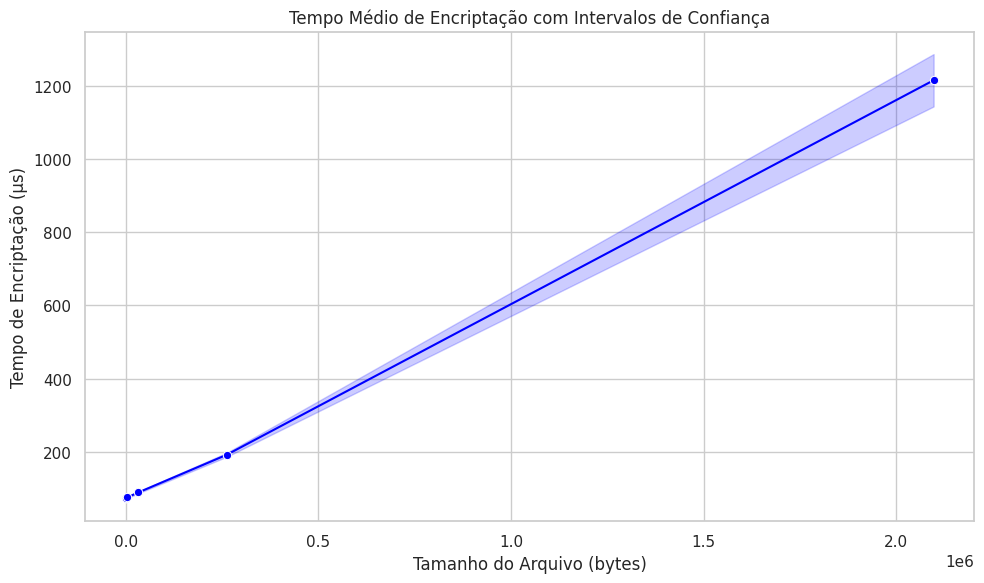

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleaned_df, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', ci='sd', marker='o', color='blue')
plt.title('Tempo Médio de Encriptação com Intervalos de Confiança')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.grid(True)
plt.tight_layout()
plt.show()

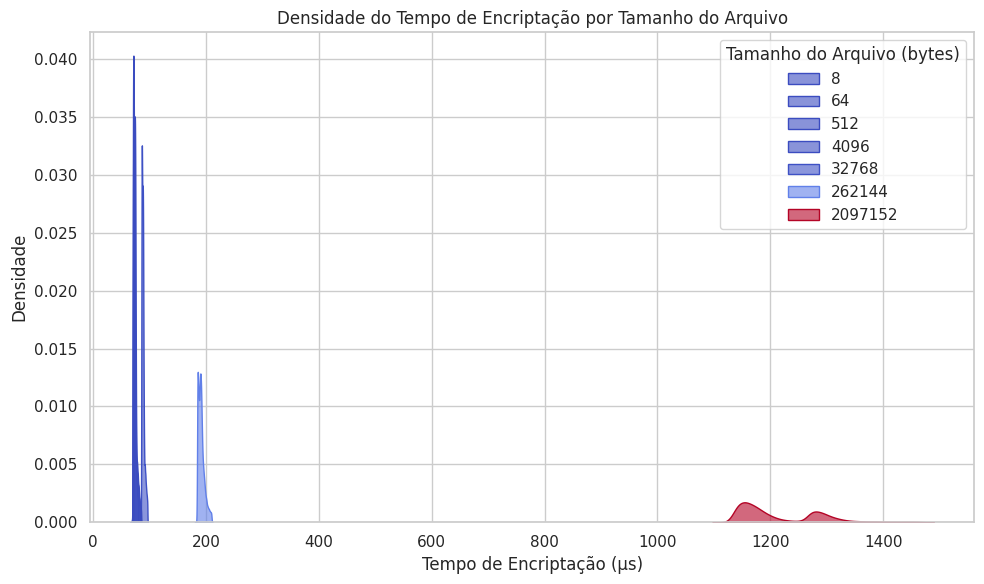

In [76]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=cleaned_df, x='Tempo de Encriptação (μs)', hue='Tamanho do Arquivo (bytes)', fill=True, palette='coolwarm', alpha=0.6)
plt.title('Densidade do Tempo de Encriptação por Tamanho do Arquivo')
plt.xlabel('Tempo de Encriptação (μs)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

/tmp/ipykernel_11827/1738654066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=cleaned_df, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', palette='coolwarm')


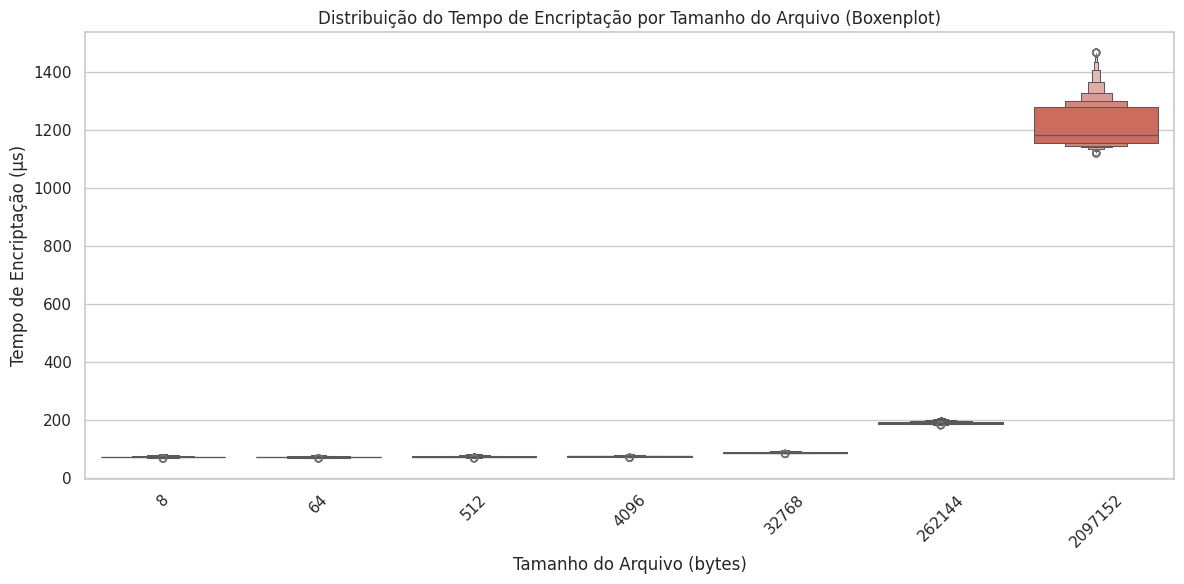

In [77]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=cleaned_df, x='Tamanho do Arquivo (bytes)', y='Tempo de Encriptação (μs)', palette='coolwarm')
plt.title('Distribuição do Tempo de Encriptação por Tamanho do Arquivo (Boxenplot)')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Tempo de Encriptação (μs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

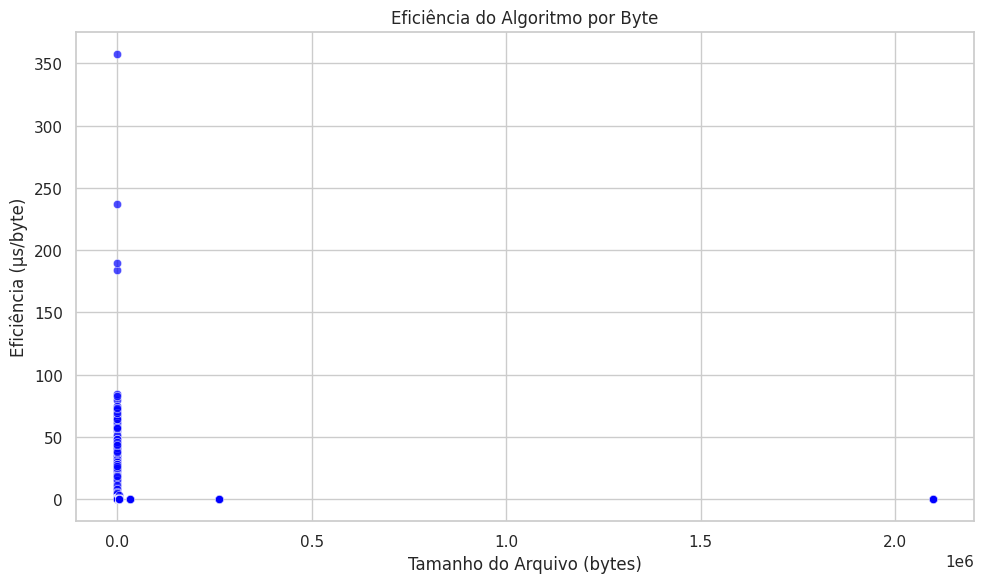

In [78]:
# Calcular a eficiência do algoritmo (tempo por byte)
df['Eficiência (μs/byte)'] = df['Tempo de Encriptação (μs)'] / df['Tamanho do Arquivo (bytes)']

# Criar o gráfico de eficiência
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tamanho do Arquivo (bytes)', y='Eficiência (μs/byte)', alpha=0.7, color='blue')
plt.title('Eficiência do Algoritmo por Byte')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Eficiência (μs/byte)')
plt.grid(True)
plt.tight_layout()
plt.show()

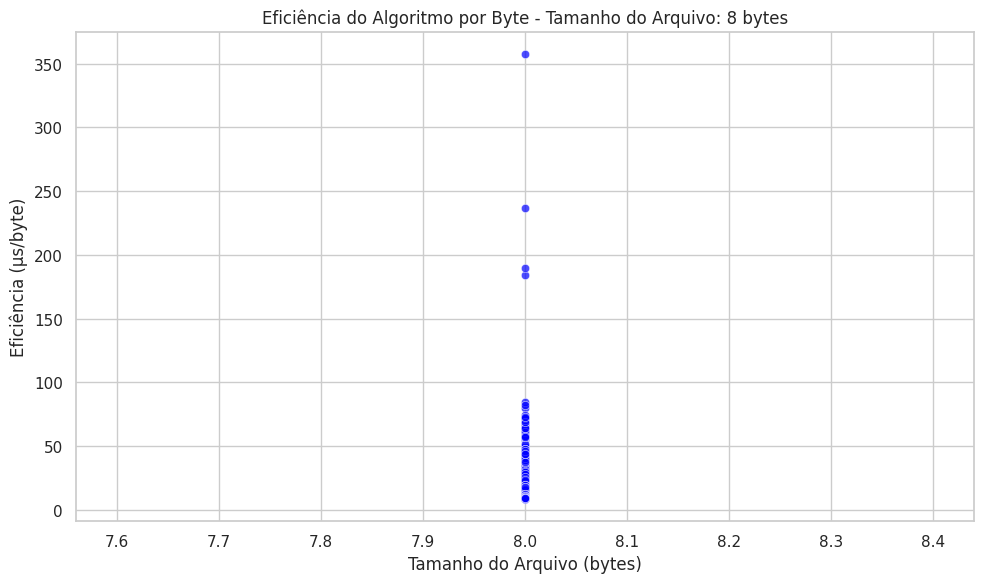

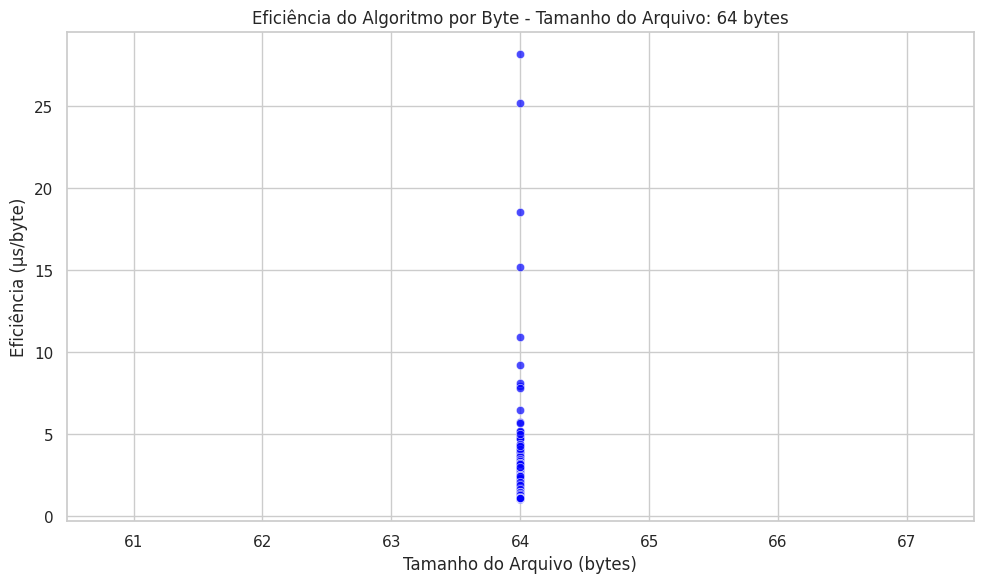

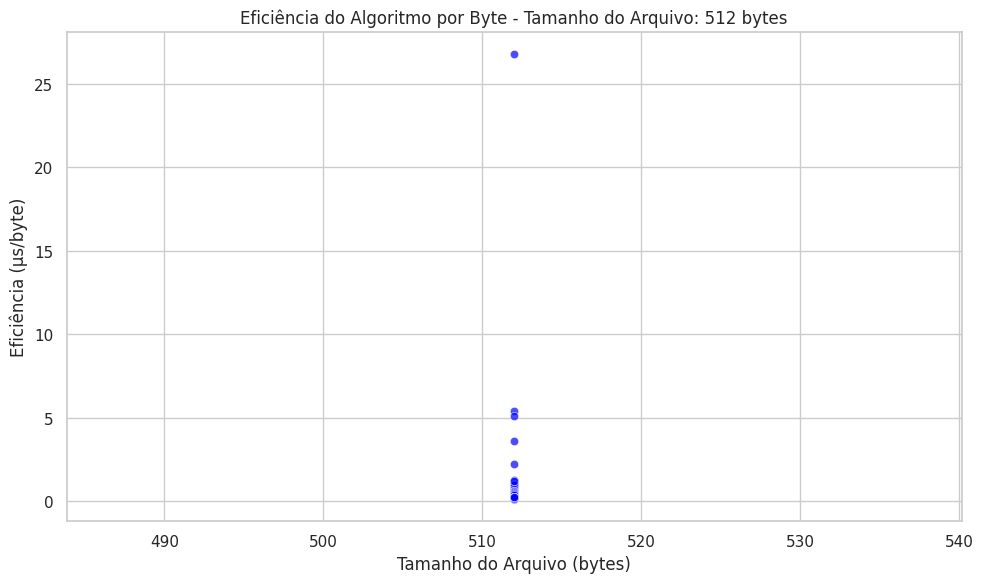

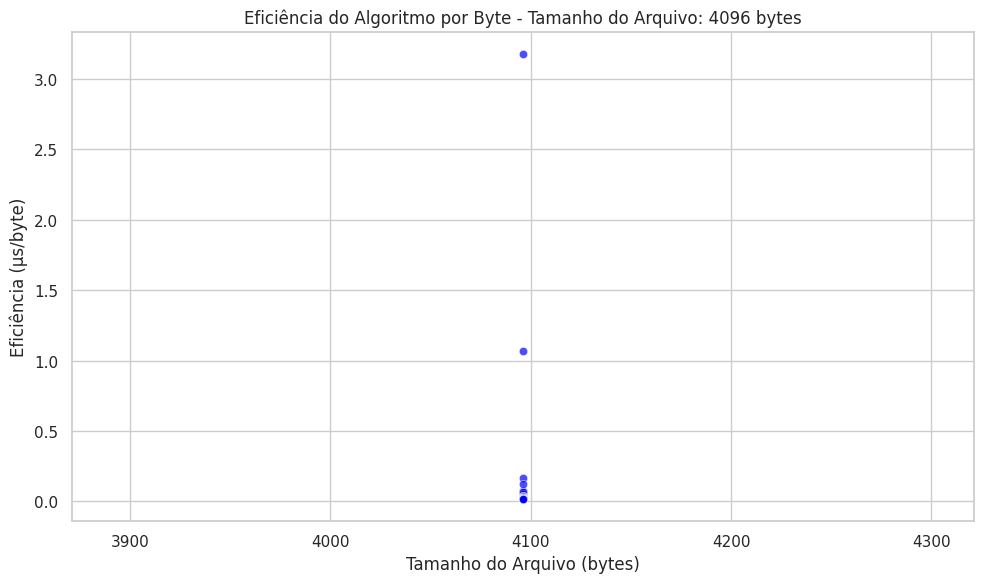

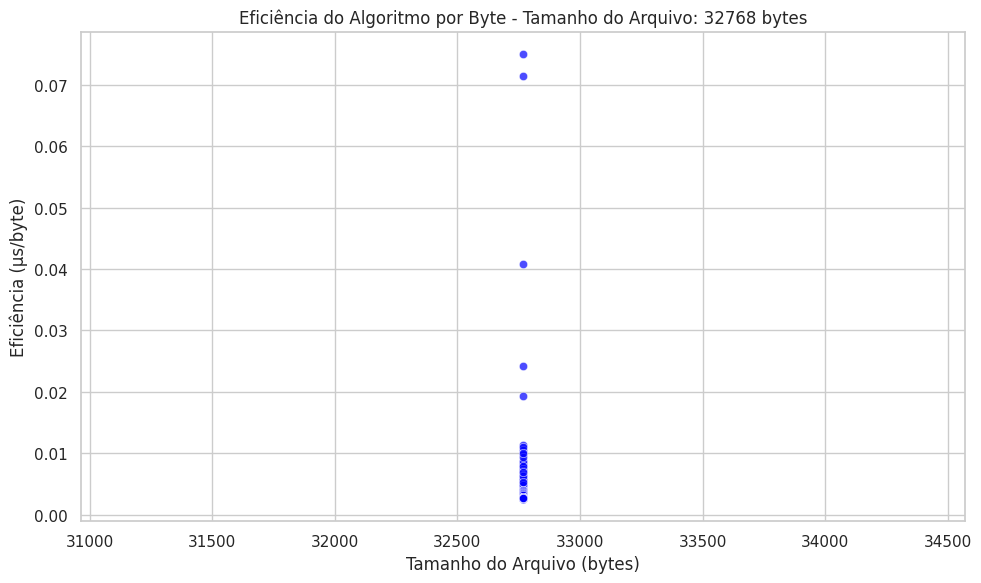

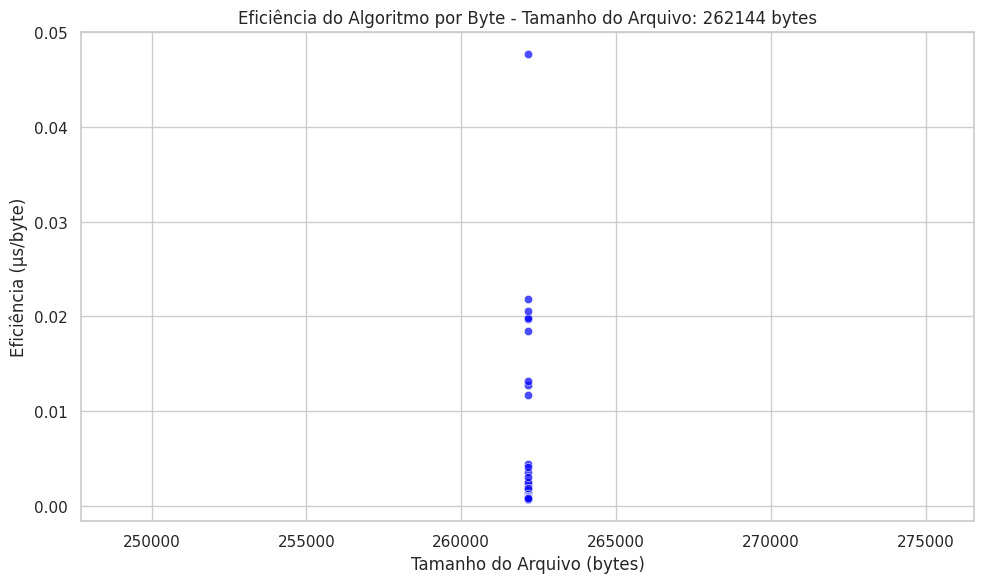

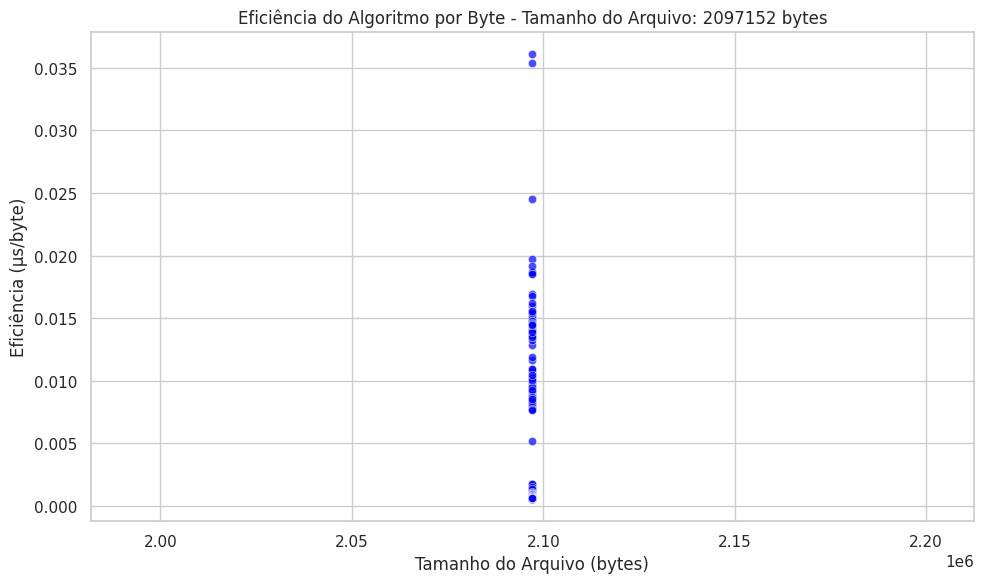

In [79]:
# Iterar sobre cada tamanho de arquivo único
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    # Filtrar os dados para o tamanho atual
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]
    
    # Criar o gráfico de eficiência para o tamanho atual
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=subset, x='Tamanho do Arquivo (bytes)', y='Eficiência (μs/byte)', alpha=0.7, color='blue')
    plt.title(f'Eficiência do Algoritmo por Byte - Tamanho do Arquivo: {tamanho_valor} bytes')
    plt.xlabel('Tamanho do Arquivo (bytes)')
    plt.ylabel('Eficiência (μs/byte)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

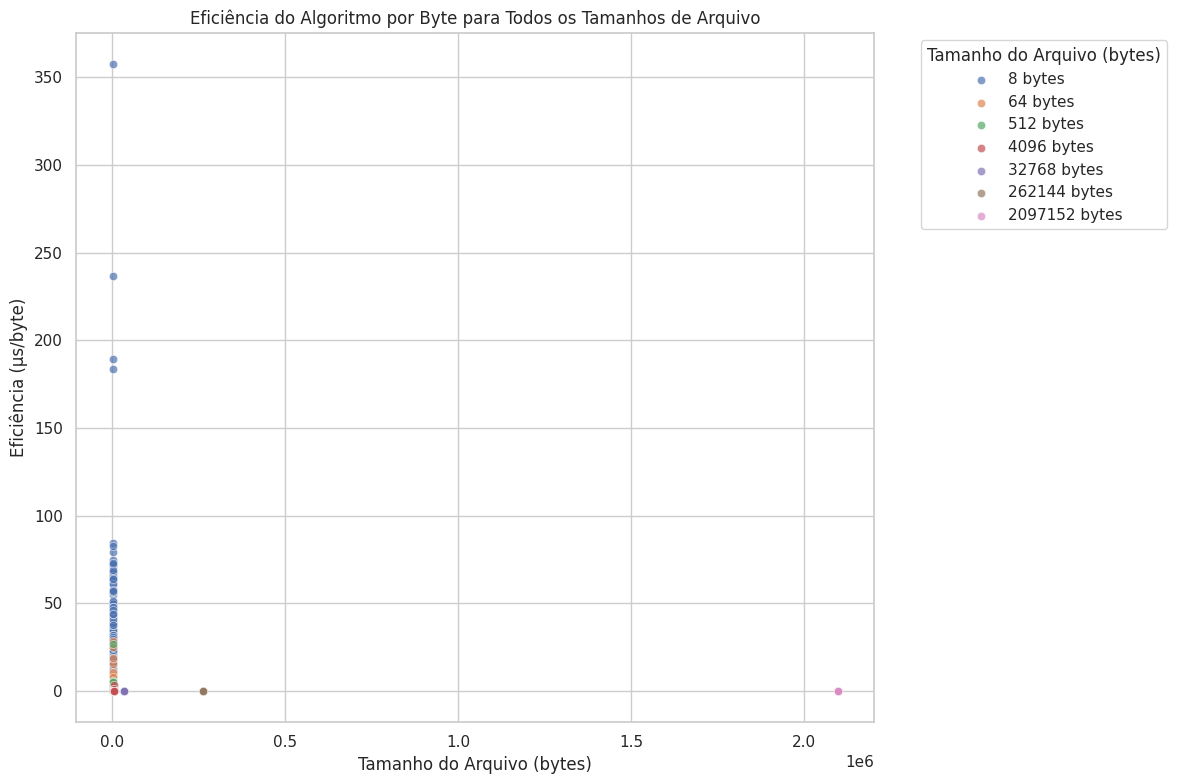

In [80]:
# Criar o gráfico combinado de eficiência para todos os tamanhos de arquivo
plt.figure(figsize=(12, 8))

# Iterar sobre cada tamanho de arquivo único
for tamanho_valor in df['Tamanho do Arquivo (bytes)'].unique():
    # Filtrar os dados para o tamanho atual
    subset = df[df['Tamanho do Arquivo (bytes)'] == tamanho_valor]
    
    # Adicionar os dados ao gráfico
    sns.scatterplot(data=subset, x='Tamanho do Arquivo (bytes)', y='Eficiência (μs/byte)', label=f'{tamanho_valor} bytes', alpha=0.7)

# Configurações do gráfico
plt.title('Eficiência do Algoritmo por Byte para Todos os Tamanhos de Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Eficiência (μs/byte)')
plt.legend(title='Tamanho do Arquivo (bytes)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

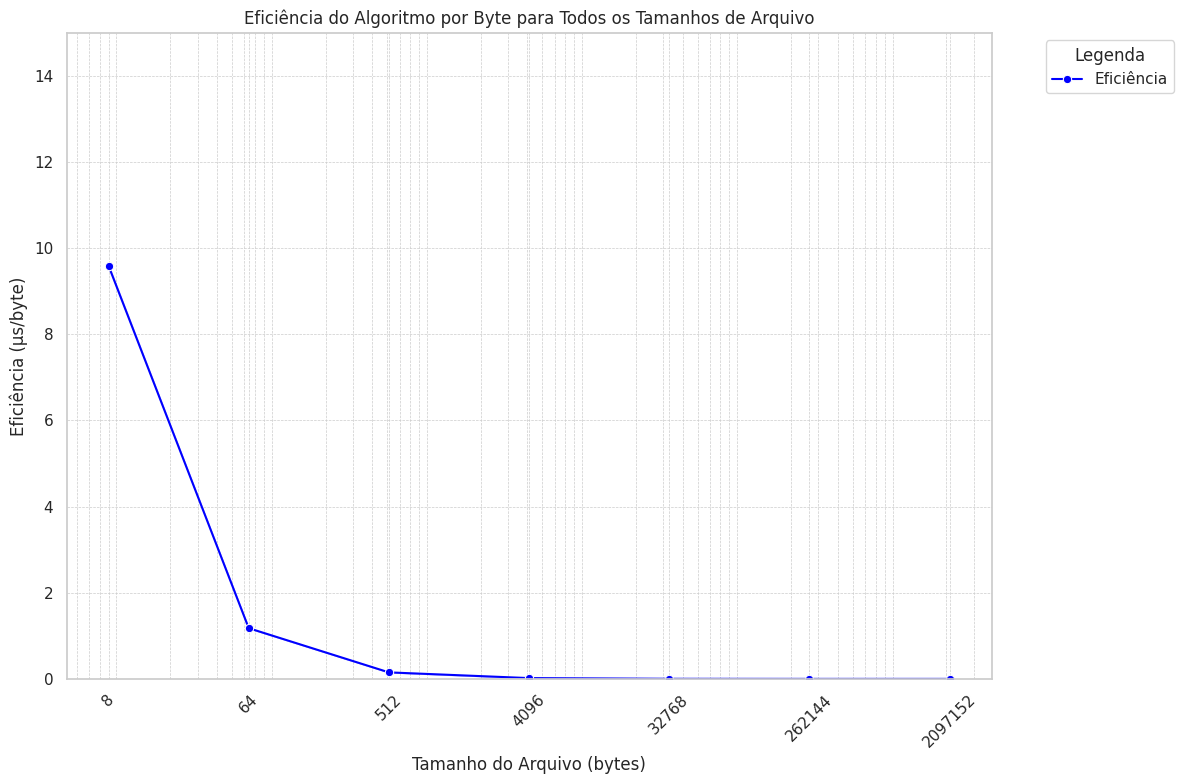

In [86]:
# Criar o gráfico combinado de eficiência para todos os tamanhos de arquivo
plt.figure(figsize=(12, 8))

# Adicionar os dados ao gráfico como uma linha única
sns.lineplot(data=df, x='Tamanho do Arquivo (bytes)', y='Eficiência (μs/byte)', marker='o', color='blue', label='Eficiência')

# Configurações do gráfico
plt.title('Eficiência do Algoritmo por Byte para Todos os Tamanhos de Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Eficiência (μs/byte)')

# Definir escala logarítmica no eixo x
plt.xscale('log')
plt.xticks([8, 64, 512, 4096, 32768, 262144, 2097152], labels=[8, 64, 512, 4096, 32768, 262144, 2097152], rotation=45)

# Limitar o eixo y para valores de 100 para baixo
plt.ylim(0, 15)

plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

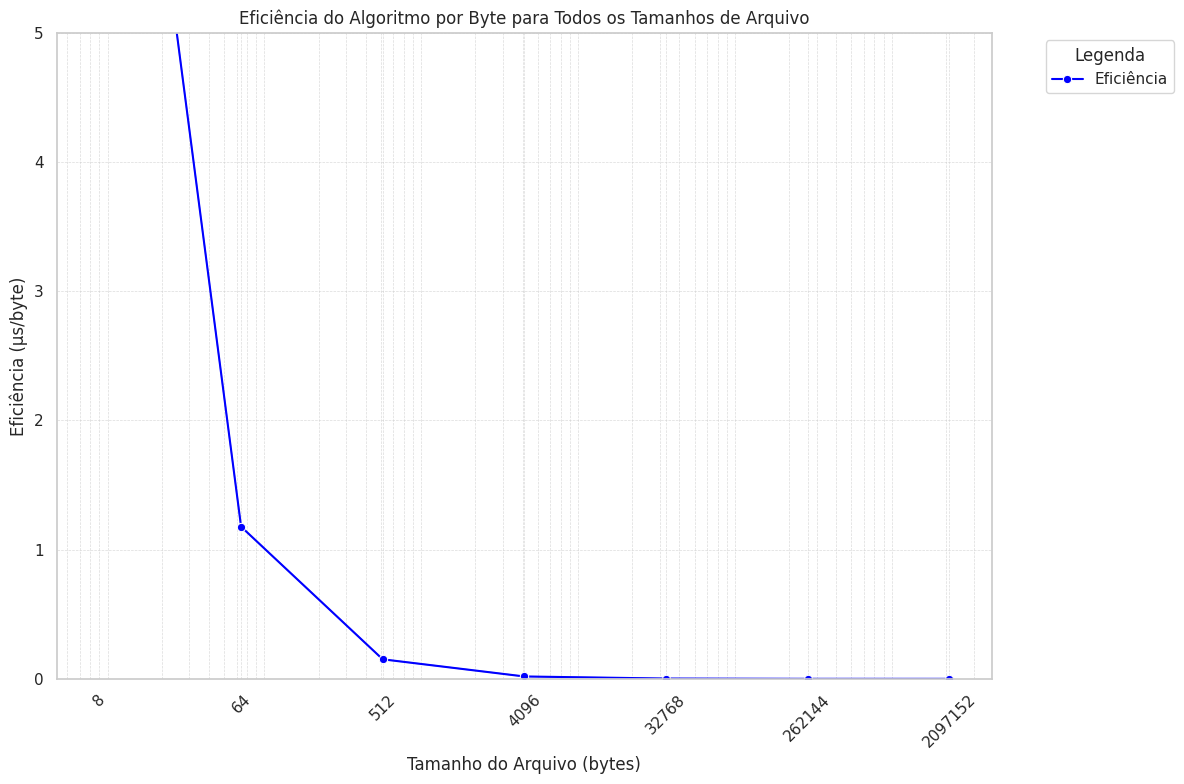

In [87]:
# Criar o gráfico combinado de eficiência para todos os tamanhos de arquivo
plt.figure(figsize=(12, 8))

# Adicionar os dados ao gráfico como uma linha única
sns.lineplot(data=df, x='Tamanho do Arquivo (bytes)', y='Eficiência (μs/byte)', marker='o', color='blue', label='Eficiência')

# Configurações do gráfico
plt.title('Eficiência do Algoritmo por Byte para Todos os Tamanhos de Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Eficiência (μs/byte)')

# Definir escala logarítmica no eixo x
plt.xscale('log')
plt.xticks([8, 64, 512, 4096, 32768, 262144, 2097152], labels=[8, 64, 512, 4096, 32768, 262144, 2097152], rotation=45)

# Limitar o eixo y para focar em valores decimais
plt.ylim(0, 5)

# Adicionar uma grade mais densa para facilitar a visualização de valores decimais
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

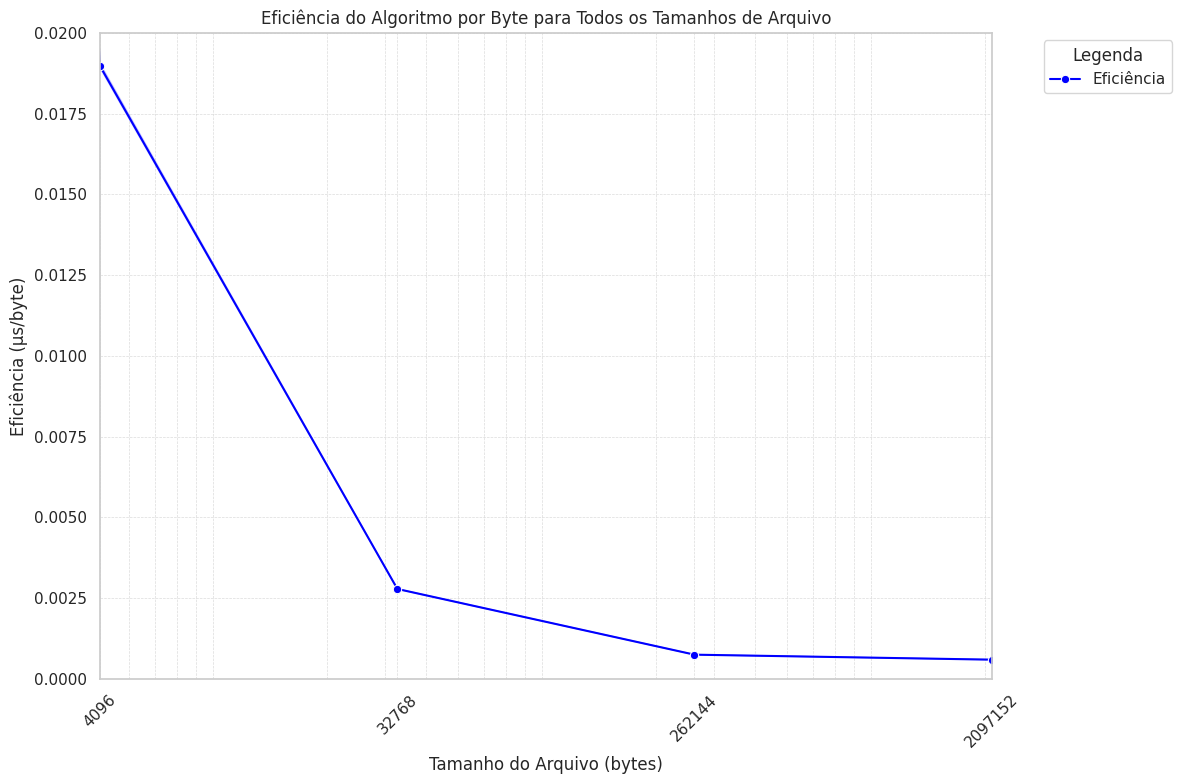

In [91]:
# Criar o gráfico combinado de eficiência para todos os tamanhos de arquivo
plt.figure(figsize=(12, 8))

# Adicionar os dados ao gráfico como uma linha única
sns.lineplot(data=df, x='Tamanho do Arquivo (bytes)', y='Eficiência (μs/byte)', marker='o', color='blue', label='Eficiência')

# Configurações do gráfico
plt.title('Eficiência do Algoritmo por Byte para Todos os Tamanhos de Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Eficiência (μs/byte)')

# Definir escala logarítmica no eixo x
plt.xscale('log')
plt.xticks([4096, 32768, 262144, 2097152], labels=[4096, 32768, 262144, 2097152], rotation=45)

# Limitar o eixo x para focar a partir de 4096
plt.xlim(4096, 2097152)

# Limitar o eixo y para focar em valores decimais
plt.ylim(0, 0.02)

# Adicionar uma grade mais densa para facilitar a visualização de valores decimais
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

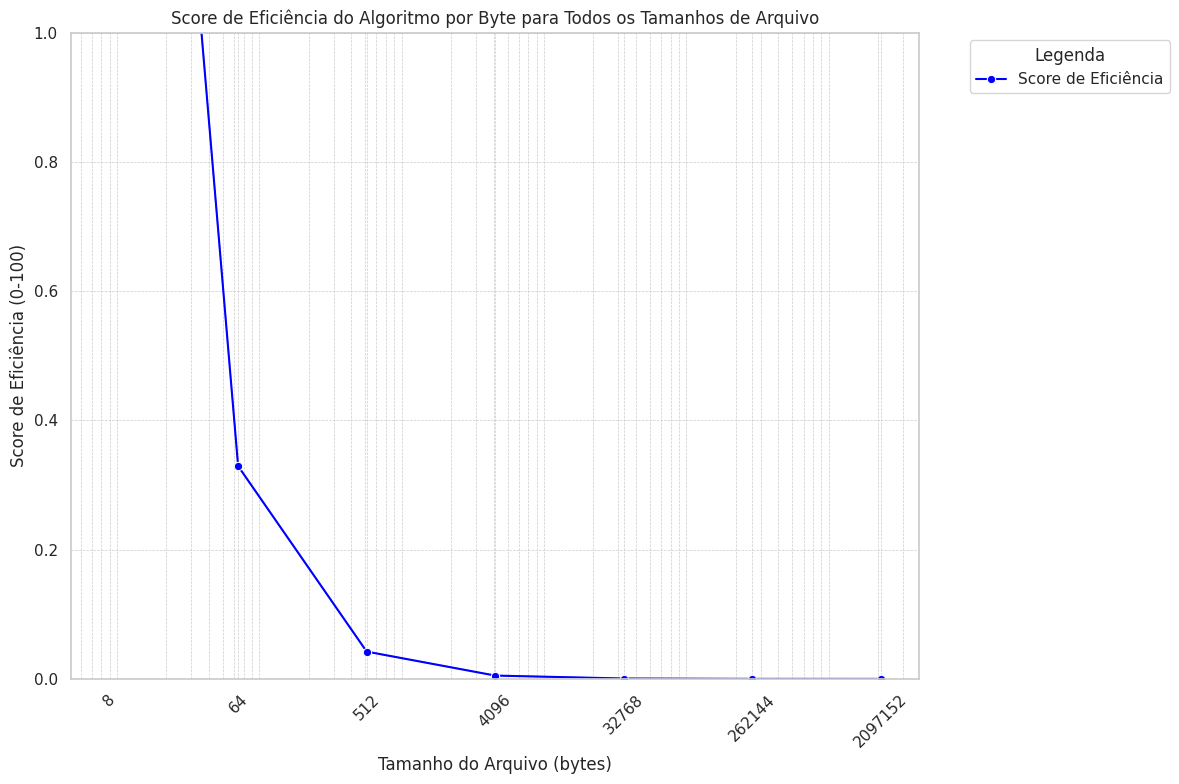

In [96]:
# Calcular a pontuação (score) normalizada para a eficiência
df['Score de Eficiência'] = (df['Eficiência (μs/byte)'] - df['Eficiência (μs/byte)'].min()) / (df['Eficiência (μs/byte)'].max() - df['Eficiência (μs/byte)'].min()) * 100

# Criar o gráfico combinado de eficiência para todos os tamanhos de arquivo
plt.figure(figsize=(12, 8))

# Adicionar os dados ao gráfico como uma linha única
sns.lineplot(data=df, x='Tamanho do Arquivo (bytes)', y='Score de Eficiência', marker='o', color='blue', label='Score de Eficiência')

# Configurações do gráfico
plt.title('Score de Eficiência do Algoritmo por Byte para Todos os Tamanhos de Arquivo')
plt.xlabel('Tamanho do Arquivo (bytes)')
plt.ylabel('Score de Eficiência (0-100)')

# Definir escala logarítmica no eixo x
plt.xscale('log')
plt.xticks([8, 64, 512, 4096, 32768, 262144, 2097152], labels=[8, 64, 512, 4096, 32768, 262144, 2097152], rotation=45)

# Limitar o eixo y para valores de 0 a 100
plt.ylim(0, 1)

plt.legend(title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()